In [1]:
from numpy.random import seed
from numpy.random import normal
from numpy import savetxt
# define underlying distribution of results
mean = 60
stev = 10
# generate samples from ideal distribution
seed(1)
results = normal(mean, stev, 1000)
# save to ASCII file
savetxt('results.csv', results)

In [2]:
!head results.csv

7.624345363663240960e+01
5.388243586349924641e+01
5.471828247736544171e+01
4.927031377843829318e+01
6.865407629324678851e+01
3.698461303119717059e+01
7.744811764216480299e+01
5.238793099104897522e+01
6.319039096057098703e+01
5.750629624522589722e+01


In [3]:
from pandas import read_csv
from numpy import std
from numpy import mean
from matplotlib import pyplot
from math import sqrt

In [4]:
# load results file
results = read_csv('results.csv', header=None)

In [40]:
results.head()

,0
0,76.243454
1,53.882436
2,54.718282
3,49.270314
4,68.654076


In [6]:
values = results.values

In [7]:
values[:2]

array([[ 76.24345364],
       [ 53.88243586]])

In [8]:
type(values)

numpy.ndarray

In [41]:
results.describe()

,0
count,1000.000000
mean,60.388125
std,9.814950
min,29.462356
25%,53.998396
50%,60.412926
75%,67.039989
max,99.586027


In [20]:
%matplotlib inline

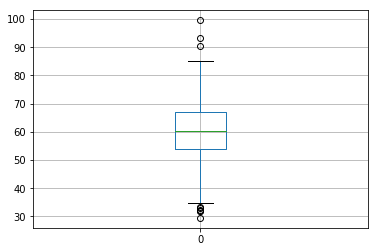

In [21]:
# box and whisker plot
results.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f140d95f128>]], dtype=object)

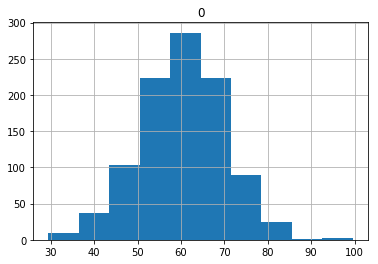

In [22]:
# histogram
results.hist()

In [42]:
# collect cumulative stats
means, confidence = list(), list()
for i in range(1,len(values)+1):
	data = values[0:i, 0]
	mean_rmse = mean(data)
	means.append(mean_rmse)

In [43]:
means[:3]

[76.243453636632424, 65.062944750065839, 61.614723992499044]

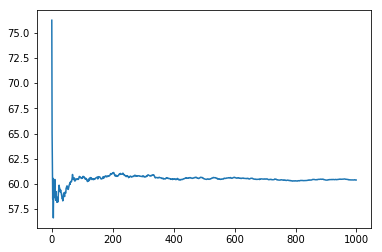

In [45]:
# line plot of cumulative values
pyplot.plot(means)

In [26]:
final_mean = mean(values)

In [27]:
final_mean

60.388124761596018

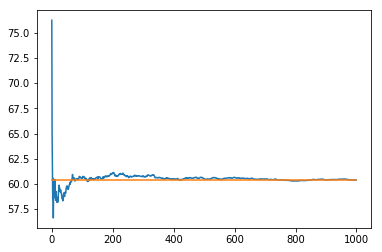

In [50]:
# line plot of cumulative values
pyplot.plot(means)
pyplot.plot([final_mean for x in range(len(means))])

In [51]:
# collect cumulative stats
std_errors = list()
for i in range(1,len(values)+1):
	data = values[0:i, 0]
	stderr = std(data) / sqrt(len(data))
	std_errors.append(stderr)

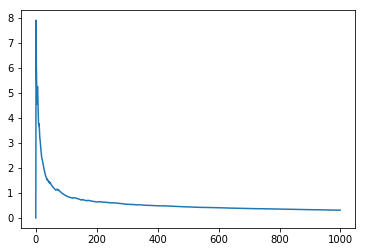

In [53]:
# line plot of cumulative values
pyplot.plot(std_errors)

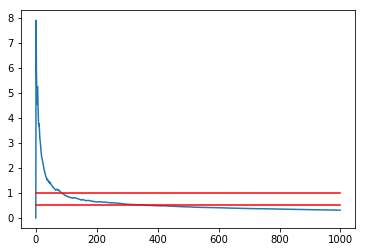

In [54]:
# line plot of cumulative values
pyplot.plot(std_errors)
pyplot.plot([0.5 for x in range(len(std_errors))], color='red')
pyplot.plot([1 for x in range(len(std_errors))], color='red')

In [34]:
# collect cumulative stats
means, confidence = list(), list()
n = len(values) + 1
for i in range(20,n):
	data = values[0:i, 0]
	mean_rmse = mean(data)
	stderr = std(data) / sqrt(len(data))
	conf = stderr * 1.96
	means.append(mean_rmse)
	confidence.append(conf)

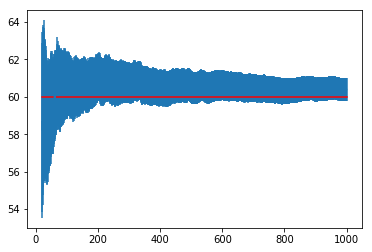

In [35]:
# line plot of cumulative values
pyplot.errorbar(range(20, n), means, yerr=confidence)
pyplot.plot(range(20, n), [60 for x in range(len(means))], color='red')
pyplot.show()

In [36]:
# collect cumulative stats
means, confidence = list(), list()
n = 200 + 1
for i in range(20,n):
	data = values[0:i, 0]
	mean_rmse = mean(data)
	stderr = std(data) / sqrt(len(data))
	conf = stderr * 1.96
	means.append(mean_rmse)
	confidence.append(conf)

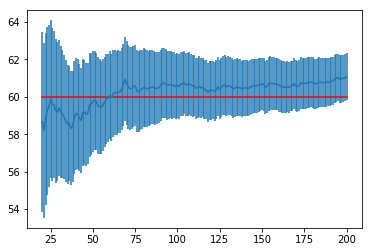

In [38]:
# line plot of cumulative values
pyplot.errorbar(range(20, n), means, yerr=confidence)
pyplot.plot(range(20, n), [60 for x in range(len(means))], color='red')
pyplot.show()

In [19]:
# http://machinelearningmastery.com/estimate-number-experiment-repeats-stochastic-machine-learning-algorithms/